## Sagemath derivation of added mass coeficient for circular shape

In the model finite depth of the channel is included

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# MatPlotLib set LaTeX font
plt.rcParams['text.usetex'] = True

In [2]:
def write_csv(data):
    
    file_name = 'results_circ.csv'
    Nr = len(data)
    
    with open(file_name, 'w', newline='') as csvfile:
        fieldnames = ['x','y']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
    
        for i in range(Nr):            
            writer.writerow({
                'x':'{:.2f}'.format(data[i][0]),
                'y':'{:.2f}'.format(data[i][1]),
                })

In [3]:
%display latex
V,A,h,a,b,x,y,th,rh, Hw = var('V A h a b x y theta rho H_w', domain='real')
z = var('z')

In [4]:
PP = A/(2*h) * coth(pi*z/(2*h))
display(PP)

1/2*A*coth(1/2*pi*z/h)/h

In [5]:
dpdx = diff(PP.subs(z=x+I*y),x)
display(dpdx)
sol = solve(dpdx.subs(x=1,y=0) - V, A)
As = -sol[0].right()
display(As)

-1/4*pi*A/(h^2*sinh(1/2*pi*(x + I*y)/h)^2)

4*V*h^2*sinh(1/2*pi/h)^2/pi

In [6]:
f = PP.subs(A=As).subs(V=1)
display(f)
fnc_3 = f.series(z,3).subs(z=I*exp(-I*th)).simplify()
fnc_5 = f.series(z,5).subs(z=I*exp(-I*th)).simplify()
fnc_7 = f.series(z,7).subs(z=I*exp(-I*th)).simplify()
fnc_N = f.series(z,12).subs(z=I*exp(-I*th)).simplify()

re_fnc_3 = real(fnc_3).simplify()
re_fnc_5 = real(fnc_5).simplify()
re_fnc_7 = real(fnc_7).simplify()
re_fnc_N = real(fnc_N).simplify()

display(re_fnc_3)
display(re_fnc_5)
display(re_fnc_7)
display(re_fnc_N)

2*h*coth(1/2*pi*z/h)*sinh(1/2*pi/h)^2/pi

4*h^2*sin(theta)*sinh(1/2*pi/h)^2/pi^2 + 1/3*sin(theta)*sinh(1/2*pi/h)^2

1/180*pi^2*sin(3*theta)*sinh(1/2*pi/h)^2/h^2 + 4*h^2*sin(theta)*sinh(1/2*pi/h)^2/pi^2 + 1/3*sin(theta)*sinh(1/2*pi/h)^2

1/7560*pi^4*sin(5*theta)*sinh(1/2*pi/h)^2/h^4 + 1/180*pi^2*sin(3*theta)*sinh(1/2*pi/h)^2/h^2 + 4*h^2*sin(theta)*sinh(1/2*pi/h)^2/pi^2 + 1/3*sin(theta)*sinh(1/2*pi/h)^2

691/326918592000*pi^10*sin(11*theta)*sinh(1/2*pi/h)^2/h^10 + 1/11975040*pi^8*sin(9*theta)*sinh(1/2*pi/h)^2/h^8 + 1/302400*pi^6*sin(7*theta)*sinh(1/2*pi/h)^2/h^6 + 1/7560*pi^4*sin(5*theta)*sinh(1/2*pi/h)^2/h^4 + 1/180*pi^2*sin(3*theta)*sinh(1/2*pi/h)^2/h^2 + 4*h^2*sin(theta)*sinh(1/2*pi/h)^2/pi^2 + 1/3*sin(theta)*sinh(1/2*pi/h)^2

/usr/lib/python3/dist-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/usr/lib/python3/dist-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


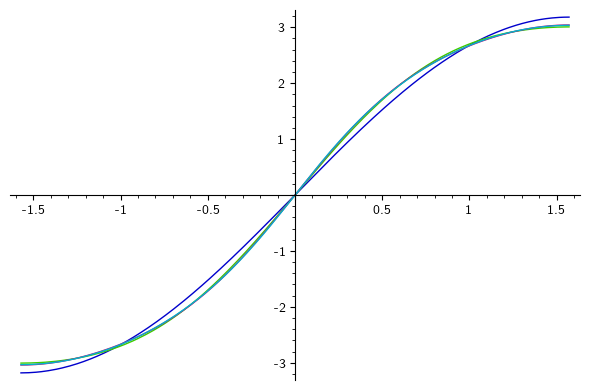

In [7]:
Hw = 1.1
plot((re_fnc_3.subs(h=Hw),re_fnc_5.subs(h=Hw),re_fnc_7.subs(h=Hw),re_fnc_N.subs(h=Hw)),(th,-pi/2,pi/2))

/usr/lib/python3/dist-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/usr/lib/python3/dist-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


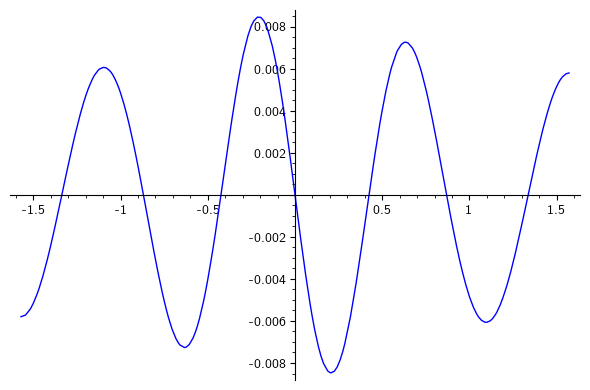

In [8]:
plot((re_fnc_7 - re_fnc_N).subs(h=Hw),(th,-pi/2,pi/2))

In [9]:
intf_3 = (integral(re_fnc_3*sin(th),(th,0,pi/2))).simplify()
intf_5 = (integral(re_fnc_5*sin(th),(th,0,pi/2))).simplify()
intf_7 = (integral(re_fnc_7*sin(th),(th,0,pi/2))).simplify()
intf_N = (integral(re_fnc_N*sin(th),(th,0,pi/2))).simplify()

display(intf_3)
display(intf_5)
display(intf_7)
display(intf_N)

1/12*pi*sinh(1/2*pi/h)^2 + h^2*sinh(1/2*pi/h)^2/pi

1/12*(pi^2*sinh(1/2*pi/h)^2 + 12*h^2*sinh(1/2*pi/h)^2)/pi

1/12*(pi^2*sinh(1/2*pi/h)^2 + 12*h^2*sinh(1/2*pi/h)^2)/pi

1/12*(pi^2*sinh(1/2*pi/h)^2 + 12*h^2*sinh(1/2*pi/h)^2)/pi

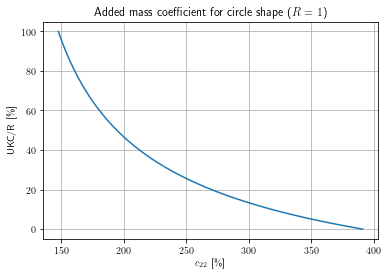

In [10]:
int_phi = lambda x: np.sinh(np.pi/(2*x))**2 * (1/3 + (2*x/np.pi)**2)

hv = np.linspace(int(1.0), int(2.0), int(100))
data = []
c22 = []
for hi in hv:
    vh1 = int_phi(hi)
    c22.append(vh1*100)
    data.append([vh1*100,(hi-1)*100])
    
plt.plot(c22,(hv-1)*100)
plt.xlabel(r'$c_{22}$ [\%]')
plt.ylabel(r'UKC/R [\%]')
plt.title(r'Added mass coefficient for circle shape ($R=1$)')
plt.grid(True)
plt.savefig(r'result_circ.pdf')

write_csv(data)